<a href="https://colab.research.google.com/github/viniventur/previsao_artigo_HW_SARIMA/blob/main/template_holt_winters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explicação:

A função a seguir roda todos os 4 modelos (add e mult na sazonalidade e tendência) para o dataframe fornecido de acordo com os parâmetros abaixo:



1. nome (str): Nome da previsão
2. df_completo (var): Dataframe com todos os dados
3. inicial_treino (str ou datatime): Data inicial dos dados de treino no formato YYYY-MM-DD
4. limite_treino (str ou datatime): Data limite dos dados de treino no formato YYYY-MM-DD
5. periodos_season (int): Períodos referentes a sazonalidade
6. numero_previsao (int): Número de observações a serem previstas

A função retorna o nome das variáveis criadas para a previsão de cada modelo específico contendo os dados concatenados (treino e previsto).




In [50]:
def previsao_hw(nome , df_completo, inicial_treino, limite_treino, periodos_season, numero_previsao):

  '''
  A função a seguir roda todos os 4 modelos (add e mult na sazonalidade e tendência) para o dataframe fornecido de acordo com os parâmetros abaixo:

  Argumentos:

  1. nome (str): Nome da previsão
  2. df_completo (var): Dataframe com todos os dados
  3. inicial_treino (str ou datatime): Data inicial dos dados de treino no formato YYYY-MM-DD
  4. limite_treino (str ou datatime): Data limite dos dados de treino no formato YYYY-MM-DD
  5. periodos_season (int): Períodos referentes a sazonalidade
  6. numero_previsao (int): Número de observações a serem previstas

  Retorno:

  Lista com os nomes das variáveis criadas para a previsão de cada modelo específico e as variáveis dos modelos individualmente contendo os dados concatenados (treino e previsto).
  '''

  # Ajustando a base de treino e real
  df_treino = df_completo.loc[(df_completo.index >= inicial_treino) & (df_completo.index <= limite_treino)]
  df_real = df_completo.loc[(df_completo.index > limite_treino)]
  df_prev_1 = pd.DataFrame(df_treino) # transformando em df caso apenas uma serie seja retornada

  # Realizando a previsão

  # Para realizar previsão de diferentes modelos dos que já estão listados aqui adicione mais itens no dict
  # Ordem: Tendência, Sazonalidade, Damped (bool)

  modelos_dic = {'prev_aa': ['add', 'add', False],
                 'prev_am': ['add', 'mul', False],
                 'prev_mm': ['mul', 'mul', False],
                 'prev_ma': ['mul', 'add', False],
                 'prev_aa_damp': ['add', 'add', True],
                 'prev_am_damp': ['add', 'mul', True],
                 'prev_mm_damp': ['mul', 'mul', True],
                 'prev_ma_damp': ['mul', 'add', True]
                 }

  for i in df_prev_1.columns:

    for nome_df, modelos in modelos_dic.items():

      modelo = ExponentialSmoothing(
                                df_prev_1[i],
                                seasonal_periods=periodos_season,
                                trend=modelos[0],
                                seasonal=modelos[1],
                                damped_trend=modelos[2]
                                ).fit()
      globals()[nome + "_mod_" + nome_df] = modelo
      previsao = modelo.forecast(numero_previsao)
      df_prev_2 = pd.concat([df_treino, previsao], axis=0)
      df_prev_2 = pd.DataFrame(df_prev_2, columns=df_prev_1.columns)
      globals()[nome + "_df_" + nome_df] = df_prev_2

  global lista_modelos
  global lista_df_prev
  lista_modelos = []
  lista_df_prev = []
  for i in modelos_dic.keys():
      lista_modelos.append(nome + "_mod_" + i)
      lista_df_prev.append(nome + "_df_" + i)

  def nomes(modelos_dic):
    print('Variaveis criadas: \n')
    print('Modelos: \n')
    print("lista_modelos \n")
    for i in modelos_dic.keys():
      print(nome + "_mod_" + i)
    print("\nDataframes com previsão: \n")
    print("lista_df_prev \n")
    for i in modelos_dic.keys():
      print(nome + "_df_" + i)

  return nomes(modelos_dic)

# Exemplo:

## Baixando pacotes

In [3]:
# Pacotes de gerenciamento do sistema operacional, como manipulação de arquivos e diretórios, gerenciamento de processos, obtenção de informações do sistema, etc.
import os
from google.colab import drive
drive.mount('/content/drive')

# Pacotes para manipulação e tratamento de dados
import numpy as np
import pandas as pd
from datetime import datetime

# Pacotes para análise gráfica
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.dates import YearLocator
from matplotlib.font_manager import FontProperties
import matplotlib as mpl
import matplotlib.ticker as mticker
import plotly.graph_objects as go
import plotly.express as px
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

# Pacotes para análise econométrica
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# ES e Holt-Winters
from statsmodels.tsa.api import SimpleExpSmoothing,Holt,ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from statsmodels.tsa.seasonal import seasonal_decompose

Mounted at /content/drive


## Tratando dados

In [51]:
df = pd.read_excel("/content/drive/MyDrive/Gerência de Estudos e Projeções/Dados/Impostos/Impostos - ICMS - ITCD - IPVA - IRRF - 1999 - 2024.xlsx", sheet_name='dados_1999_2024')
df['Total'] = df.ICMS + df.IPVA + df.IRRF + df.ITCD
df

,ANO,MES,ICMS,IPVA,ITCD,IRRF,Total
0,1999,1,4.035843e+07,658956.65,21163.97,3.293230e+03,4.104184e+07
1,1999,2,3.894808e+07,1032605.36,13089.30,8.150040e+03,4.000192e+07
2,1999,3,3.194334e+07,2489990.52,26279.08,0.000000e+00,3.445961e+07
3,1999,4,3.415198e+07,1851256.22,42705.30,0.000000e+00,3.604594e+07
4,1999,5,3.282836e+07,1905139.44,27892.99,0.000000e+00,3.476139e+07
...,...,...,...,...,...,...,...
302,2024,3,6.412978e+08,46837316.37,3990607.28,7.723583e+07,7.693616e+08
303,2024,4,6.901577e+08,64609203.08,4789282.70,8.712705e+07,8.466832e+08
304,2024,5,6.356771e+08,73725244.53,4528985.51,9.139155e+07,8.053229e+08
305,2024,6,6.307851e+08,71891371.15,5737256.86,1.084689e+08,8.168826e+08


In [52]:
# Limpando a base

df.dropna(inplace=True)
df['Data'] = pd.to_datetime(df['ANO'].astype(str) + '-' + df['MES'].astype(str))
df = df.set_index("Data")
df = df.drop(['MES', 'ANO'], axis=1)
df

,ICMS,IPVA,ITCD,IRRF,Total
Data,,,,,
1999-01-01,4.035843e+07,658956.65,21163.97,3.293230e+03,4.104184e+07
1999-02-01,3.894808e+07,1032605.36,13089.30,8.150040e+03,4.000192e+07
1999-03-01,3.194334e+07,2489990.52,26279.08,0.000000e+00,3.445961e+07
1999-04-01,3.415198e+07,1851256.22,42705.30,0.000000e+00,3.604594e+07
1999-05-01,3.282836e+07,1905139.44,27892.99,0.000000e+00,3.476139e+07
...,...,...,...,...,...
2024-02-01,6.385334e+08,40180682.59,5812958.30,8.310542e+07,7.676325e+08
2024-03-01,6.412978e+08,46837316.37,3990607.28,7.723583e+07,7.693616e+08
2024-04-01,6.901577e+08,64609203.08,4789282.70,8.712705e+07,8.466832e+08


## Rodando a previsão para 16 meses após agosto de 2022 (final do ano de 2022 + 2023)

In [53]:
df_ipva = df['IPVA']
df_ipva = df_ipva.loc[df.index >= '2008-01-01']
df_ipva

Data
2008-01-01     3089289.71
2008-02-01     4518615.04
2008-03-01     6134471.17
2008-04-01     8201420.84
2008-05-01     8670808.35
                 ...     
2024-02-01    40180682.59
2024-03-01    46837316.37
2024-04-01    64609203.08
2024-05-01    73725244.53
2024-06-01    71891371.15
Name: IPVA, Length: 198, dtype: float64

In [54]:
previsao_hw('IPVA', df_ipva, df_ipva.index.min(), '2022-08-01', 12, 16)

Variaveis criadas: 

Modelos: 

lista_modelos 

IPVA_mod_prev_aa
IPVA_mod_prev_am
IPVA_mod_prev_mm
IPVA_mod_prev_ma
IPVA_mod_prev_aa_damp
IPVA_mod_prev_am_damp
IPVA_mod_prev_mm_damp
IPVA_mod_prev_ma_damp

Dataframes com previsão: 

lista_df_prev 

IPVA_df_prev_aa
IPVA_df_prev_am
IPVA_df_prev_mm
IPVA_df_prev_ma
IPVA_df_prev_aa_damp
IPVA_df_prev_am_damp
IPVA_df_prev_mm_damp
IPVA_df_prev_ma_damp


In [9]:
lista_modelos

['IPVA_mod_prev_aa',
 'IPVA_mod_prev_am',
 'IPVA_mod_prev_mm',
 'IPVA_mod_prev_ma',
 'IPVA_mod_prev_aa_damp',
 'IPVA_mod_prev_am_damp',
 'IPVA_mod_prev_mm_damp',
 'IPVA_mod_prev_ma_damp']

In [10]:
lista_df_prev

['IPVA_df_prev_aa',
 'IPVA_df_prev_am',
 'IPVA_df_prev_mm',
 'IPVA_df_prev_ma',
 'IPVA_df_prev_aa_damp',
 'IPVA_df_prev_am_damp',
 'IPVA_df_prev_mm_damp',
 'IPVA_df_prev_ma_damp']

In [55]:
# Rodando um modelo de exemplo
IPVA_df_prev_mm_damp

,IPVA
2008-01-01,3.089290e+06
2008-02-01,4.518615e+06
2008-03-01,6.134471e+06
2008-04-01,8.201421e+06
2008-05-01,8.670808e+06
...,...
2023-08-01,3.810888e+07
2023-09-01,2.842802e+07
2023-10-01,2.206717e+07
2023-11-01,1.786736e+07


## Avaliando melhor modelo

In [56]:
data_ini_prev = '2022-09-01'
df_real = df_ipva
df_real = df_real.loc[(df_real.index >= data_ini_prev) & (df_real.index <= '2023-12-01')]

dfs_prev = [IPVA_df_prev_aa,
            IPVA_df_prev_am,
            IPVA_df_prev_mm,
            IPVA_df_prev_ma,
            IPVA_df_prev_aa_damp,
            IPVA_df_prev_am_damp,
            IPVA_df_prev_mm_damp,
            IPVA_df_prev_ma_damp]

mods = [IPVA_mod_prev_aa,
        IPVA_mod_prev_am,
        IPVA_mod_prev_mm,
        IPVA_mod_prev_ma,
        IPVA_mod_prev_aa_damp,
        IPVA_mod_prev_am_damp,
        IPVA_mod_prev_mm_damp,
        IPVA_mod_prev_ma_damp]

df_error = pd.DataFrame(index=['AA','AM', 'MM', 'MA', 'AAD','AMD', 'MMD', 'MAD'],
                        columns=['MAPE', 'MAE', 'RMSE', 'AIC', 'BIC'])

In [57]:
for lin, dfs_prev, mods in zip(range(0,10), dfs_prev, mods):
  df_error.iloc[lin, 0] = round(MAPE(df_real, dfs_prev.loc[(dfs_prev.index >= data_ini_prev)])*100,2)
  df_error.iloc[lin, 1] = round(MAE(df_real, dfs_prev.loc[(dfs_prev.index >= data_ini_prev)]),2)
  df_error.iloc[lin, 2] = round(MSE(df_real, dfs_prev.loc[(dfs_prev.index >= data_ini_prev)], squared=False),2)
  df_error.iloc[lin, 3] = round(mods.aic,2)
  df_error.iloc[lin, 4] = round(mods.bic,2)
df_error.sort_values(by='MAPE', inplace=True)
df_error

,MAPE,MAE,RMSE,AIC,BIC
MM,10.59,4329844.89,5054042.41,5582.06,5632.79
MAD,11.18,5710299.34,7724588.3,5562.4,5616.3
AA,11.23,5670889.89,7619102.5,5559.47,5610.2
AAD,11.54,6062627.99,8352201.83,5564.84,5618.74
MA,13.03,5178005.39,6169894.32,5556.03,5606.76
MMD,21.5,9007058.35,10447949.84,5572.34,5626.24
AM,21.64,9065255.41,10504087.56,5567.92,5618.65
AMD,24.84,10436828.08,11931880.05,5576.47,5630.37


# Analisando intervalos de confiança e intervalos de previsão

In [58]:
IPVA_df_prev_mm

,IPVA
2008-01-01,3.089290e+06
2008-02-01,4.518615e+06
2008-03-01,6.134471e+06
2008-04-01,8.201421e+06
2008-05-01,8.670808e+06
...,...
2023-08-01,4.845835e+07
2023-09-01,3.608159e+07
2023-10-01,2.809909e+07
2023-11-01,2.287864e+07


In [59]:
df_prev_real = pd.DataFrame(df_ipva.loc[(df_ipva.index >= '2022-09-01') & (df_ipva.index <= '2023-12-01')].copy())
df_prev_real['Previsao'] = IPVA_df_prev_mm.loc[(IPVA_df_prev_mm.index >= '2022-09-01') & (IPVA_df_prev_mm.index <= '2023-12-01')].copy()
df_prev_real.rename(columns={'IPVA': 'Real'}, inplace=True)
df_prev_real

,Real,Previsao
Data,,
2022-09-01,34581089.82,3.051273e+07
2022-10-01,28019444.36,2.376226e+07
2022-11-01,19444161.37,1.934753e+07
2022-12-01,16460877.34,1.358945e+07
2023-01-01,87731781.40,8.166238e+07
2023-02-01,38299782.86,3.874454e+07
2023-03-01,53108739.12,5.855931e+07
2023-04-01,51508904.49,5.709886e+07
2023-05-01,75214488.41,7.295406e+07


### Formula para o intervalo de confiança:

$$CI = \overline{X} \pm  Z \times (\frac{\sigma}{\sqrt{n}})$$

### Formula para o intervalo de previsão:

$$PI = \overline{X} \pm  Z \times {\sigma} \times \sqrt{1 + (\frac{1}{n}})$$

In [60]:
# Utilizando z-score de distribuição normal
n = len(df_prev_real)
df_prev_real['error'] = df_prev_real['Real'] - df_prev_real['Previsao']
s = df_prev_real['error'].std(ddof=1)

df_prev_real['conf_interval'] = 1.96 * s / np.sqrt(n)
df_prev_real['pred_interval'] = 1.96 * s * np.sqrt(1 + 1/n)

# Calculando limites superiores e inferiores para cada previsão
df_prev_real['conf_lower'] = df_prev_real['Previsao'] - df_prev_real['conf_interval']
df_prev_real['conf_upper'] = df_prev_real['Previsao'] + df_prev_real['conf_interval']
df_prev_real['pred_lower'] = df_prev_real['Previsao'] - df_prev_real['pred_interval']
df_prev_real['pred_upper'] = df_prev_real['Previsao'] + df_prev_real['pred_interval']
df_prev_real

,Real,Previsao,error,conf_interval,pred_interval,conf_lower,conf_upper,pred_lower,pred_upper
Data,,,,,,,,,
2022-09-01,34581089.82,3.051273e+07,4.068356e+06,2.096806e+06,8.645351e+06,2.841593e+07,3.260954e+07,2.186738e+07,3.915809e+07
2022-10-01,28019444.36,2.376226e+07,4.257188e+06,2.096806e+06,8.645351e+06,2.166545e+07,2.585906e+07,1.511691e+07,3.240761e+07
2022-11-01,19444161.37,1.934753e+07,9.662828e+04,2.096806e+06,8.645351e+06,1.725073e+07,2.144434e+07,1.070218e+07,2.799288e+07
2022-12-01,16460877.34,1.358945e+07,2.871424e+06,2.096806e+06,8.645351e+06,1.149265e+07,1.568626e+07,4.944102e+06,2.223480e+07
2023-01-01,87731781.40,8.166238e+07,6.069402e+06,2.096806e+06,8.645351e+06,7.956557e+07,8.375918e+07,7.301703e+07,9.030773e+07
2023-02-01,38299782.86,3.874454e+07,-4.447570e+05,2.096806e+06,8.645351e+06,3.664773e+07,4.084135e+07,3.009919e+07,4.738989e+07
2023-03-01,53108739.12,5.855931e+07,-5.450572e+06,2.096806e+06,8.645351e+06,5.646251e+07,6.065612e+07,4.991396e+07,6.720466e+07
2023-04-01,51508904.49,5.709886e+07,-5.589955e+06,2.096806e+06,8.645351e+06,5.500205e+07,5.919566e+07,4.845351e+07,6.574421e+07
2023-05-01,75214488.41,7.295406e+07,2.260430e+06,2.096806e+06,8.645351e+06,7.085725e+07,7.505086e+07,6.430871e+07,8.159941e+07


In [61]:
# Utilizando T de student para os intervalos
n = len(df_prev_real)
df_prev_real['error'] = df_prev_real['Real'] - df_prev_real['Previsao']
s = df_prev_real['error'].std(ddof=1)
t = stats.t.ppf(0.975, df=n-1)

df_prev_real['conf_interval'] = t  * s / np.sqrt(n)
df_prev_real['pred_interval'] = t  * s * np.sqrt(1 + (1/n))

# Calculando limites superiores e inferiores para cada previsão
df_prev_real['conf_lower'] = df_prev_real['Previsao'] - df_prev_real['conf_interval']
df_prev_real['conf_upper'] = df_prev_real['Previsao'] + df_prev_real['conf_interval']
df_prev_real['pred_lower'] = df_prev_real['Previsao'] - df_prev_real['pred_interval']
df_prev_real['pred_upper'] = df_prev_real['Previsao'] + df_prev_real['pred_interval']
df_prev_real

,Real,Previsao,error,conf_interval,pred_interval,conf_lower,conf_upper,pred_lower,pred_upper
Data,,,,,,,,,
2022-09-01,34581089.82,3.051273e+07,4.068356e+06,2.280222e+06,9.401597e+06,2.823251e+07,3.279296e+07,2.111114e+07,3.991433e+07
2022-10-01,28019444.36,2.376226e+07,4.257188e+06,2.280222e+06,9.401597e+06,2.148203e+07,2.604248e+07,1.436066e+07,3.316385e+07
2022-11-01,19444161.37,1.934753e+07,9.662828e+04,2.280222e+06,9.401597e+06,1.706731e+07,2.162776e+07,9.945936e+06,2.874913e+07
2022-12-01,16460877.34,1.358945e+07,2.871424e+06,2.280222e+06,9.401597e+06,1.130923e+07,1.586968e+07,4.187856e+06,2.299105e+07
2023-01-01,87731781.40,8.166238e+07,6.069402e+06,2.280222e+06,9.401597e+06,7.938216e+07,8.394260e+07,7.226078e+07,9.106398e+07
2023-02-01,38299782.86,3.874454e+07,-4.447570e+05,2.280222e+06,9.401597e+06,3.646432e+07,4.102476e+07,2.934294e+07,4.814614e+07
2023-03-01,53108739.12,5.855931e+07,-5.450572e+06,2.280222e+06,9.401597e+06,5.627909e+07,6.083953e+07,4.915771e+07,6.796091e+07
2023-04-01,51508904.49,5.709886e+07,-5.589955e+06,2.280222e+06,9.401597e+06,5.481864e+07,5.937908e+07,4.769726e+07,6.650046e+07
2023-05-01,75214488.41,7.295406e+07,2.260430e+06,2.280222e+06,9.401597e+06,7.067384e+07,7.523428e+07,6.355246e+07,8.235566e+07


## Visualizando (exemplo: modelo M-M)

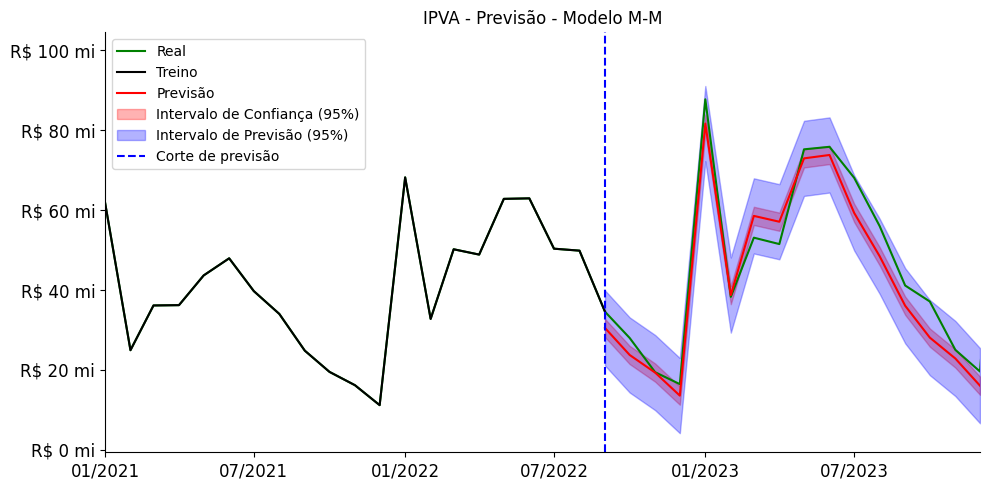

In [63]:
fig, ax = plt.subplots(figsize=(10, 5))

# Base de dados para os graficos
ini_treino = '2021-01-01'
fim_treino = '2022-08-01'
fim_prev = '2023-12-01'
ini_prev = '2022-09-01'

df_graf_treino = df_ipva.loc[(df_ipva.index >= ini_treino) & (df_ipva.index <= ini_prev)]
df_graf_real = df_ipva.loc[(df_ipva.index >= ini_treino)]
df_graf_prev = df_prev_real.loc[df_prev_real.index >= '2022-07-01']['Previsao'].copy()


# Real
sns.lineplot(x=df_graf_real.index, y=df_graf_real, label='Real', ax=ax, color='green')
# Treino
sns.lineplot(x=df_graf_treino.index, y=df_graf_treino, label='Treino', ax=ax, color='black')
# Previsão
sns.lineplot(x=df_graf_prev.index, y=df_graf_prev.values, label='Previsão', ax=ax, color='red')
# Intervalo de Confiança
plt.fill_between(df_prev_real.index, df_prev_real['conf_lower'], df_prev_real['conf_upper'],
                color='red', alpha=0.3, label='Intervalo de Confiança (95%)')
# Intervalo de Previsão
plt.fill_between(df_prev_real.index, df_prev_real['pred_lower'], df_prev_real['pred_upper'],
                color='blue', alpha=0.3, label='Intervalo de Previsão (95%)')

# Formatação
def formatar_milhares(x, pos):
  return f'R$ {x/1000000:.0f} mi'
formatter = mticker.FuncFormatter(formatar_milhares)
year_locator = YearLocator(base=2)
ax.xaxis.set_major_locator(year_locator)
ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(min(df_graf_treino.index), max(df_graf_prev.index))
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_xticks(pd.date_range(start='2021-01-01', end='2023-12-01', freq='6MS'))
ax.set_xticklabels(pd.date_range(start='2021-01-01', end='2023-12-01', freq='6MS').strftime('%m/%Y'))
ax.axvline(x=pd.to_datetime('2022-09-01'), color='blue', linestyle='--', label='Corte de previsão')
ax.legend(loc='upper left')
ax.set_title('IPVA - Previsão - Modelo M-M')
plt.tight_layout()
#plt.savefig('grafico.png', dpi=800)
plt.show()